# House Price Prediction using Linear Regression

## Internship Task 2

### Objective

The objective of this project is to predict house prices using Linear Regression based on features such as area, number of rooms, and location. The project demonstrates data preprocessing, model training, and evaluation using Python.


## Importing Required Libraries

In this step, we import all the necessary Python libraries required for data handling, visualization, model training, and evaluation.

- `pandas` and `numpy` are used for data manipulation and numerical operations.
- `matplotlib` and `seaborn` help in visualizing data and model results.
- `scikit-learn` provides tools for splitting data, scaling features, training the Linear Regression model, and evaluating its performance.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


## Loading the Dataset

The dataset is loaded using pandas from a CSV file obtained from Kaggle.  
This dataset contains information about house features such as area, number of rooms, and location, along with the target variable (house price).

Loading the dataset is the first step to understand the structure and contents of the data.


In [9]:
df = pd.read_csv("house_prices.csv")


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Understanding the Dataset

Before building the model, it is important to explore the dataset.

- `df.head()` displays the first few rows of the dataset.
- `df.info()` provides information about column data types and missing values.
- `df.describe()` gives a statistical summary of numerical features.

This step helps identify potential issues such as missing values or incorrect data types.


In [31]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,...,date_20150513T000000,date_20150514T000000,date_20150515T000000,date_20150524T000000,date_20150527T000000,waterfront_Y,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,7,1180,...,False,False,False,False,False,False,False,False,False,False
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,7,2170,...,False,False,False,False,False,False,False,False,False,False
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,6,770,...,False,False,False,False,False,False,False,False,False,False
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,7,1050,...,False,False,False,False,False,False,False,False,False,True
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,8,1680,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21396 entries, 0 to 21612
Columns: 394 entries, id to condition_Very Good
dtypes: bool(376), float64(5), int64(13)
memory usage: 10.8 MB


In [33]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.139600e+04,2.139600e+04,21396.000000,21396.000000,21396.000000,2.139600e+04,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000
mean,4.586696e+09,5.181153e+05,3.360909,2.097460,2050.491400,1.499324e+04,1.490512,0.216255,7.626239,1766.210273,284.281127,1970.989250,82.271593,98078.083333,47.559458,-122.213655,1971.608058,12696.709712
std,2.877291e+09,2.845875e+05,0.923862,0.746921,861.406875,4.097949e+04,0.539255,0.729263,1.135380,791.592670,430.401009,29.307383,396.793784,53.470361,0.139050,0.141226,668.096205,27203.764165
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124547e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.026000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,1951.750000,0.000000,98033.000000,47.469075,-122.329000,1480.000000,5100.000000
50%,3.905000e+09,4.500000e+05,3.000000,2.250000,1900.000000,7.575500e+03,1.500000,0.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.570700,-122.230000,1830.000000,7600.000000
75%,7.320653e+09,6.350000e+05,4.000000,2.500000,2520.000000,1.054850e+04,2.000000,0.000000,8.000000,2190.000000,550.000000,1997.000000,0.000000,98118.000000,47.678400,-122.124000,2340.000000,10021.250000
max,9.900000e+09,1.960000e+06,33.000000,7.500000,7730.000000,1.651359e+06,3.500000,4.000000,13.000000,7420.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Handling Categorical Variables

Linear Regression works only with numerical data.  
Therefore, categorical variables such as location or furnishing status are converted into numerical format using one-hot encoding.

The `get_dummies()` function is used to convert categorical columns into binary variables while avoiding the dummy variable trap.


In [34]:
df = pd.get_dummies(df, drop_first=True)


## Separating Features and Target Variable
Features are inputs and price is the target variable.


In [35]:
X = df.drop("price", axis=1)
y = df["price"]


## Removing Outliers

House price data often contains extreme values that can negatively affect model performance.

To handle this, extreme outliers in the target variable are removed using percentile-based filtering.  
This helps improve model stability and leads to better predictions.


In [36]:
# Remove extreme price outliers (top 1%)
upper_limit = df['price'].quantile(0.99)
df = df[df['price'] < upper_limit]


## Train-Test Split
The dataset is split to evaluate model performance on unseen data.


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Feature Scaling
Scaling ensures all features contribute equally to the model.


In [25]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
model = LinearRegression()
 #model.fit(X_train, y_train)


## Model Training with Log-Transformed Target
Log transformation helps handle skewness in house prices.


In [27]:
#y_pred = model.predict(X_test)
# Log transform the target variable
y_train_log = np.log(y_train)

# Train model on log-transformed prices
model = LinearRegression()
model.fit(X_train, y_train_log)

# Predict log prices
y_pred_log = model.predict(X_test)

# Convert predictions back to original scale
y_pred = np.exp(y_pred_log)



## Model Evaluation
RMSE and R² score are used to measure prediction accuracy.


In [28]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 281724.2168269923
R2 Score: 0.4749949700458417


## Visualization of Results
This plot compares actual and predicted prices.


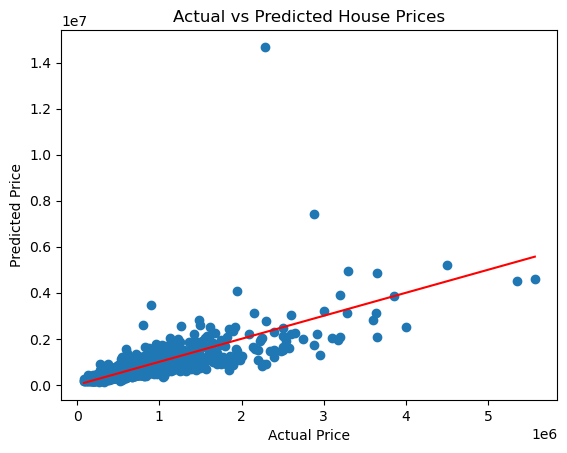

In [29]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


### Key Insights

- House size shows a positive correlation with price.
- Location and other categorical features significantly influence house prices.
- Linear Regression captures the overall pricing trend for most houses.
- Model performance improves after feature scaling and log transformation.


### Conclusion

This project successfully implemented a Linear Regression model to predict house prices using multiple features. Data preprocessing and scaling improved model performance. While the model has limitations for high-priced houses, it provides a solid baseline for price prediction.
